In [184]:
from ProjectTools import OpenBeds
from ProjectTools.OpenBeds import filterDepth
import pandas as pd

dry = True

if dry == True:
    top_hmc_genes = pd.read_excel('./top_hmc_genes_testSet.xlsx').to_dict()
    top_hmc_genes.pop("Unnamed: 0")

    tab_bed_path = './test_data/CRR008807_TAB_merged.bedGraph.gz.bismark.zero.cov_sub.bed'
    nano_3mod_path = './test_data/prom_R10.4.1_E8.2_WGS_brain_0.9.1_mods_sub.bed'
    
    nano_mc_df, nano_hmc_df = map(filterDepth, OpenBeds.get_nanopore_threeMod_wStrand(nano_3mod_path))
    tab_df = filterDepth(OpenBeds.get_bismark(tab_bed_path, "5hmC"))

else:
    top_hmc_genes = pd.read_excel('./top_hmc_genes.xlsx').to_dict()
    top_hmc_genes.pop("Unnamed: 0")

    tab_bed_path = './data/TAB_data/CRR008807_TAB_merged.bedGraph.gz.bismark.zero.cov'
    nano_3mod_path = './data/prom_R10.4.1_E8.2_WGS_brain_0.9.1_mods.bed'

    nano_mc_df, nano_hmc_df = map(filterDepth, OpenBeds.get_nanopore_threeMod_wStrand(nano_3mod_path))
    tab_df = filterDepth(OpenBeds.get_bismark(tab_bed_path, "5hmC"))

In [185]:
top_hmc_genes

{'geneName': {0: 'Paqr8',
  1: 'Inpp1',
  2: 'Chst10',
  3: 'Nck2',
  4: 'Mfsd6',
  5: 'Nrp2',
  6: 'Dst,Mir6896',
  7: 'Mob4',
  8: 'Tmeff2',
  9: 'Bend6',
  10: 'Bmpr2',
  11: 'Adgrb3,Gm20172',
  12: 'Map2',
  13: 'Klf7,Mir6899',
  14: 'Map4k4',
  15: 'Phf3',
  16: 'Jph1',
  17: 'Ncoa2',
  18: 'Gm35600',
  19: 'Inpp4a',
  20: 'Tmem131',
  21: 'Ino80d',
  22: 'Pcmtd1',
  23: 'Lmbrd1',
  24: 'Tbc1d8',
  25: 'Abi2',
  26: 'Fam168b',
  27: 'Als2,Mpp4',
  28: 'Rims1',
  29: 'Smap1',
  30: 'Rb1cc1',
  31: 'Gls',
  32: 'Sumo1',
  33: 'Cnnm4',
  34: 'Rev1',
  35: 'Nab1',
  36: 'Fam117b',
  37: 'Bag2',
  38: 'Clk1'},
 'ratio_TAB': {0: 0.4254999804654853,
  1: 0.3700510353024585,
  2: 0.3276166454343977,
  3: 0.5491735340612012,
  4: 0.4273434882192565,
  5: 0.3802951754468299,
  6: 0.4223662800398195,
  7: 0.3774345902635378,
  8: 0.3657337892922684,
  9: 0.3308544456236315,
  10: 0.3977087509440451,
  11: 0.3609652003394397,
  12: 0.4842413768796822,
  13: 0.7991485722254953,
  14: 0.4930903

In [186]:
import subprocess

genes_info = {}

for gene_name in top_hmc_genes["geneName"].values():
    gene_info = subprocess.check_output(
        "grep {gene_name} ./feature_references/fig5_features/mm39_RefSeqC_select_merged_modified.bed".format(
        gene_name=gene_name), shell=True).decode(
        "UTF-8").split()
    gene_entry = {
        gene_name : 
        {
        "chromosome" : gene_info[0],
        "chromStart" : gene_info[1],
        "chromEnd" : gene_info[2],
        "strand" : gene_info[5]
        }
        }
    
    genes_info.update(gene_entry)

In [187]:
top_gene_bed = pd.DataFrame(genes_info).T.reset_index()[["chromosome", "chromStart", "chromEnd", "strand", "index"]].rename(
                    columns={"index" : "geneName"})
top_gene_bed

,chromosome,chromStart,chromEnd,strand,geneName
0,chr1,20960771,21009874,+,Paqr8
1,chr1,52828578,52856847,-,Inpp1
2,chr1,38902953,38937241,-,Chst10
3,chr1,43484910,43609678,+,Nck2
4,chr1,52695444,52766517,-,Mfsd6
5,chr1,62742475,62857851,+,Nrp2
6,chr1,33947305,34347743,+,"Dst,Mir6896"
7,chr1,55170403,55194058,+,Mob4
8,chr1,50966681,51226429,+,Tmeff2
9,chr1,33891132,33946848,-,Bend6


In [188]:
from pybedtools import BedTool

def addStrandsToBismark(df, strand_bed_path):
    names=["chromosome", "chromStart", "chromEnd", "modification_type", "readCount", "percentMeth", "method", ".", ".1", ".2", "strand"]

    strands_df = BedTool.intersect(BedTool.from_dataframe(df), 
                                   BedTool(strand_bed_path), wb=True).to_dataframe(
        names=names).drop(columns=[".", ".1", ".2"])
    
    strands_df = strands_df[["chromosome", "chromStart", "chromEnd", "strand", "modification_type", "readCount", "percentMeth", "method"]]
    
    return strands_df

def geneIntersect(df): 
    df = df[["chromosome", "chromStart", "chromEnd", "readCount", "percentMeth", "strand"]]
    gene_info_df = pd.DataFrame(genes_info).T.reset_index().rename(
        columns={"index" : "geneName"})
    gene_info_df["."] = "." 
    gene_info_df = gene_info_df[["chromosome", "chromStart", "chromEnd", "geneName", ".", "strand"]]
    
    gene_df = BedTool.intersect(
                BedTool.from_dataframe(df),
                BedTool.from_dataframe(gene_info_df),
                wb=True, s=True).to_dataframe(
        names=["chromosome", "chromStart", "chromEnd", "readCount", "percentMeth", "strand", ".1", ".2", ".3", "geneName", ".4", ".5"]).drop(
        columns=["readCount", ".1", ".2", ".3", ".4", ".5"], errors="ignore")
    return gene_df

nano_intersect = geneIntersect(nano_hmc_df)
tab_intersect = geneIntersect(addStrandsToBismark(tab_df, './data/TAB_data/CRR008807_TAB_cytosine_report.tsv.CpG_report_strands.zero.bed'))


In [189]:
merged_intersects = pd.merge(nano_intersect, tab_intersect, "inner", ["chromosome", "chromStart", "chromEnd", "strand", "geneName"], suffixes=["_Nano", "_TAB"])

In [190]:
Rb1cc1_df = merged_intersects.loc[merged_intersects["geneName"] == "Rb1cc1"]
Rb1cc1_df["bin"] = pd.cut(Rb1cc1_df["chromStart"], 20)

Map2_df = merged_intersects.loc[merged_intersects["geneName"] == "Map2"]
Map2_df["bin"] = pd.cut(Map2_df["chromStart"], 20)

Gls_df = merged_intersects.loc[merged_intersects["geneName"] == "Gls"]
Gls_df["bin"] = pd.cut(Gls_df["chromStart"], 20)


/tmp/ipykernel_2093755/4106500142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rb1cc1_df["bin"] = pd.cut(Rb1cc1_df["chromStart"], 20)
/tmp/ipykernel_2093755/4106500142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Map2_df["bin"] = pd.cut(Map2_df["chromStart"], 20)
/tmp/ipykernel_2093755/4106500142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [204]:
gene_ex_bin = Rb1cc1_df.groupby("bin")[["percentMeth_Nano", "percentMeth_TAB"]].mean()
gene_ex_bin2 = Map2_df.groupby("bin")[["percentMeth_Nano", "percentMeth_TAB"]].mean()

In [197]:
merged_intersects = merged_intersects.set_index(merged_intersects["chromStart"])

Text(0.5, 487.3333333333332, 'Chromosomal position')

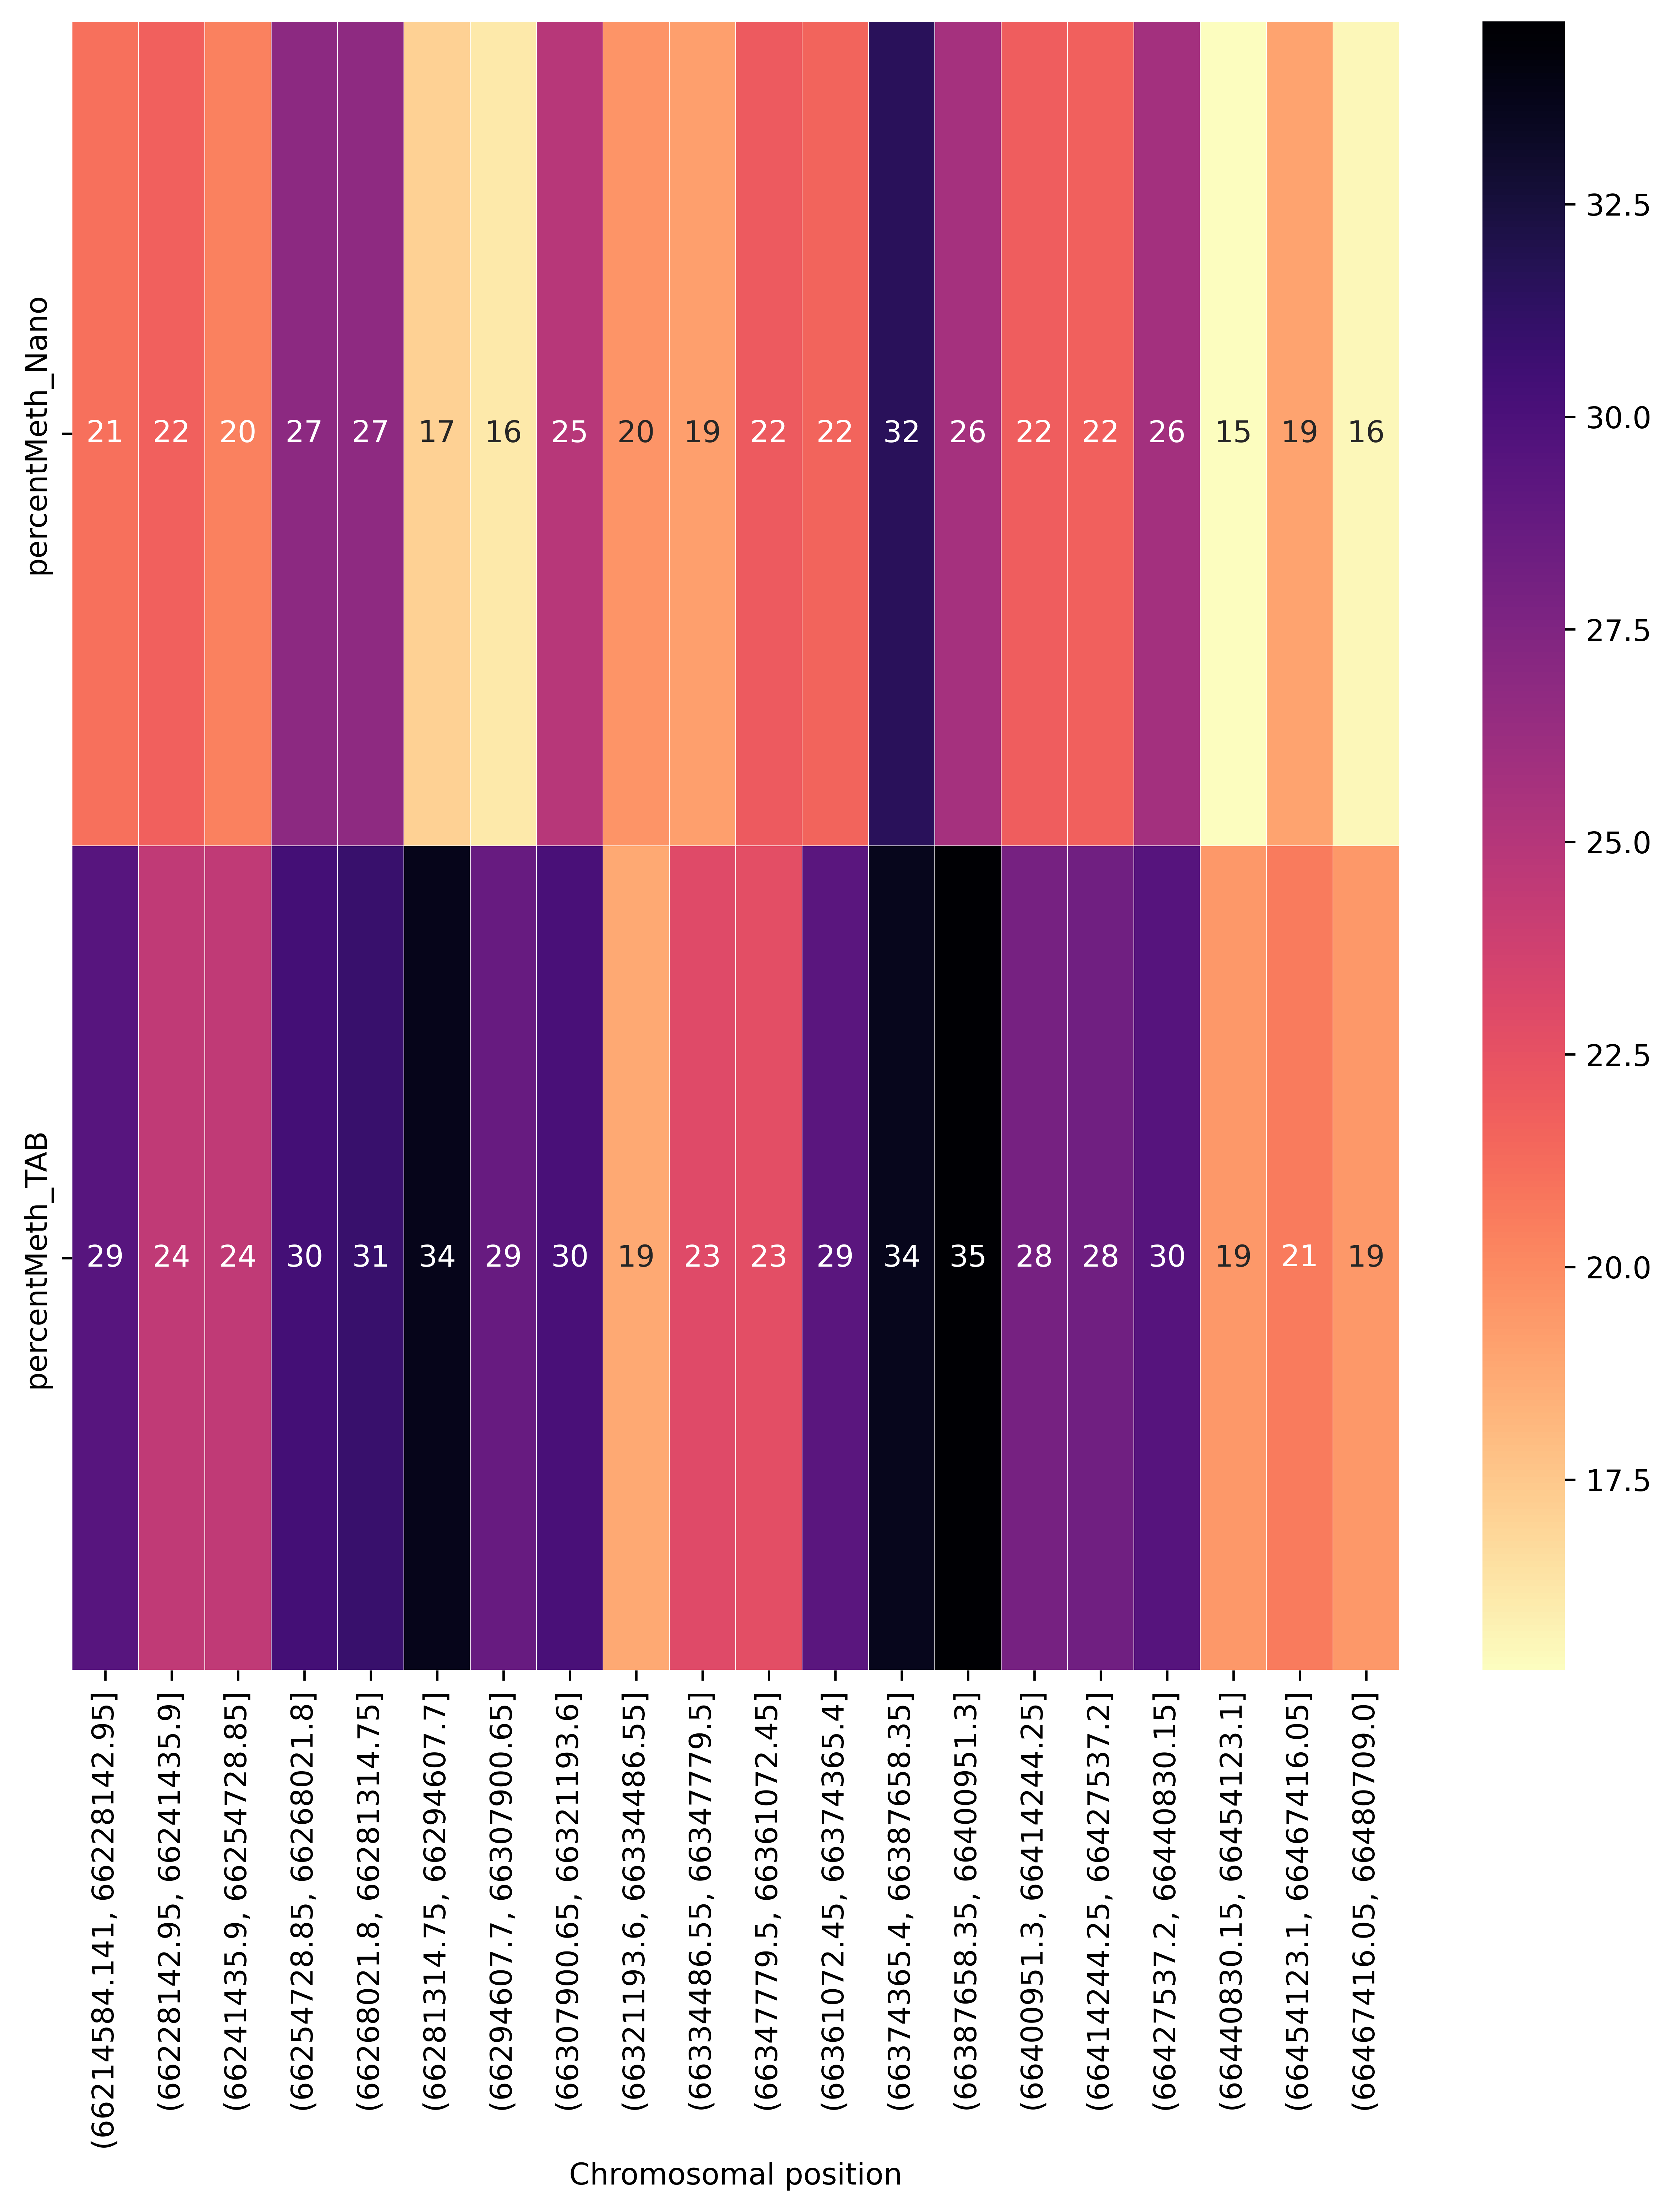

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10), dpi=600)

ax1 = fig.add_subplot(111)
sns.heatmap(gene_ex_bin2.T, linewidths=0.05, ax=ax1, cmap="magma_r", annot=True)
ax1.set_xlabel("Chromosomal position")

In [194]:
merged_intersects

,chromosome,chromStart,chromEnd,percentMeth_Nano,strand,geneName,percentMeth_TAB
chromStart,,,,,,,
6285491,chr1,6285491,6285492,6.67,+,Rb1cc1,0.000000
6285497,chr1,6285497,6285498,0.00,+,Rb1cc1,0.000000
6285811,chr1,6285811,6285812,0.00,+,Rb1cc1,0.000000
6285836,chr1,6285836,6285837,9.09,+,Rb1cc1,0.000000
6287314,chr1,6287314,6287315,31.25,+,Rb1cc1,71.428571
...,...,...,...,...,...,...,...
66478706,chr1,66478706,66478707,0.00,+,Map2,7.692308
66478772,chr1,66478772,66478773,7.14,+,Map2,15.384615
66478860,chr1,66478860,66478861,0.00,+,Map2,21.052632


In [195]:
target_bed = pd.DataFrame(genes_info).T.reset_index()[["chromosome", "chromStart", "chromEnd"]]
target_bed.to_csv('./feature_references/fig7_genes/target_genes.bed', sep="\t", header=None, index=None)